<a href="https://colab.research.google.com/github/gandhimonil9823/CS_GO_Analysis/blob/main/Correlations_and_pairplots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

### Mount data from Google Drive

In [3]:
#mount data folder from google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Change dir and check contents

In [4]:
cd '/content/drive/Shareddrives/CS_GO_Data/processed_data_v2/aggregated_data'

/content/drive/Shareddrives/CS_GO_Data/processed_data_v2/aggregated_data


In [5]:
ls

matches_agg.csv  rounds_agg.csv


### 1) load data


In [6]:
%%time
matches_agg = pd.read_csv('/content/drive/Shareddrives/CS_GO_Data/processed_data_v2/aggregated_data/matches_agg.csv')
rounds_agg = pd.read_csv('/content/drive/Shareddrives/CS_GO_Data/processed_data_v2/aggregated_data/rounds_agg.csv')

CPU times: user 619 ms, sys: 107 ms, total: 725 ms
Wall time: 2.27 s


In [7]:
matches_agg

,file,map,num_rounds,avg_round_duration,avg_equip_val,team_1_score,team_2_score,winner,winner_class
0,esea_match_13770997.dem,de_overpass,25,84.747674,20009.375000,9,16,Team 2,-1
1,esea_match_13779704.dem,de_cache,39,97.655995,21298.717949,18,21,Team 2,-1
2,esea_match_13779770.dem,de_mirage,29,94.112689,18600.000000,14,15,Team 2,-1
3,esea_match_13779775.dem,de_inferno,30,94.452687,19579.166667,16,14,Team 1,1
4,esea_match_13779780.dem,de_inferno,29,102.916448,18168.103448,15,14,Team 1,1
...,...,...,...,...,...,...,...,...,...
13456,esea_match_13829155.dem,de_cache,29,81.956562,18927.586207,16,13,Team 1,1
13457,esea_match_13829165.dem,de_dust2,24,74.316426,18516.304348,15,9,Team 1,1
13458,esea_match_13829169.dem,de_mirage,18,87.696972,16775.000000,15,3,Team 1,1
13459,esea_match_13829171.dem,de_train,24,75.069213,18711.458333,16,8,Team 1,1


In [8]:
rounds_agg

,file,map,round,start_seconds,end_seconds,round_duration,ct_eq_val,t_eq_val,round_type,final_ct_alive,final_t_alive,is_bomb_planted,bomb_site,winner_team,winner_side,winner_class,winner_side_class,past_halftime
0,esea_match_13770997.dem,de_overpass,1,94.30782,160.9591,66.65128,4300,4250,PISTOL_ROUND,0,1,1,-1,Team 2,Terrorist,-1,-1,0
1,esea_match_13770997.dem,de_overpass,2,160.95910,279.3998,118.44070,6300,19400,ECO,1,2,0,0,Team 2,Terrorist,-1,-1,0
2,esea_match_13770997.dem,de_overpass,3,279.39980,341.0084,61.60860,7650,19250,SEMI_ECO,0,4,0,0,Team 2,Terrorist,-1,-1,0
3,esea_match_13770997.dem,de_overpass,4,341.00840,435.4259,94.41750,24900,23400,NORMAL,0,1,1,1,Team 2,Terrorist,-1,-1,0
4,esea_match_13770997.dem,de_overpass,5,435.42590,484.2398,48.81390,5400,20550,ECO,3,0,0,0,Team 1,CounterTerrorist,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340328,esea_match_13829173.dem,de_mirage,18,1647.20600,1694.6550,47.44900,4500,21950,ECO,0,3,0,0,Team 1,Terrorist,1,-1,1
340329,esea_match_13829173.dem,de_mirage,19,1694.65500,1753.4380,58.78300,16400,26100,NORMAL,0,3,0,0,Team 1,Terrorist,1,-1,1
340330,esea_match_13829173.dem,de_mirage,20,1753.43800,1803.6580,50.22000,15100,26000,FORCE_BUY,0,3,0,0,Team 1,Terrorist,1,-1,1
340331,esea_match_13829173.dem,de_mirage,21,1803.65800,1856.0850,52.42700,17550,25500,NORMAL,0,2,0,0,Team 1,Terrorist,1,-1,1


### apply standard scaler

In [9]:
stdscl = StandardScaler()
stdscl

StandardScaler(copy=True, with_mean=True, with_std=True)

In [10]:
std_matches_agg = pd.DataFrame(data=StandardScaler().fit_transform(matches_agg[['num_rounds',	'avg_round_duration',	'avg_equip_val',	'team_1_score',	'team_2_score']]),columns=['num_rounds',	'avg_round_duration',	'avg_equip_val',	'team_1_score',	'team_2_score'])
std_matches_agg[['map','winner_class']] = matches_agg[['map','winner_class']]
std_matches_agg

,num_rounds,avg_round_duration,avg_equip_val,team_1_score,team_2_score,map,winner_class
0,-0.114617,-0.323955,1.319312,-0.943692,0.768251,de_overpass,-1
1,3.102073,1.318159,2.518032,1.218854,1.888616,de_cache,-1
2,0.804437,0.867402,0.008996,0.257723,0.544178,de_mirage,-1
3,1.034201,0.910655,0.919341,0.738288,0.320104,de_inferno,1
4,0.804437,1.987361,-0.392544,0.498005,0.320104,de_inferno,1
...,...,...,...,...,...,...,...
13456,0.804437,-0.679023,0.313558,0.738288,0.096031,de_cache,1
13457,-0.344381,-1.650952,-0.068817,0.498005,-0.800261,de_dust2,1
13458,-1.722962,0.051236,-1.687732,0.498005,-2.144700,de_mirage,1
13459,-0.344381,-1.555188,0.112620,0.738288,-1.024334,de_train,1


In [11]:
cols_to_standardize=['round',	'round_duration',	'ct_eq_val', 't_eq_val', 'final_ct_alive', 'final_t_alive'] #start and end seconds not used
cols_to_copy=['map','is_bomb_planted','bomb_site','winner_class','winner_side_class','past_halftime']

std_rounds_agg = pd.DataFrame(data=StandardScaler().fit_transform(rounds_agg[cols_to_standardize]),columns=cols_to_standardize)
std_rounds_agg[cols_to_copy] = rounds_agg[cols_to_copy]
std_rounds_agg

,round,round_duration,ct_eq_val,t_eq_val,final_ct_alive,final_t_alive,map,is_bomb_planted,bomb_site,winner_class,winner_side_class,past_halftime
0,-1.584582,-0.734664,-1.399625,-1.609951,-0.916157,-0.242764,de_overpass,1,-1,-1,-1,0
1,-1.459545,1.091897,-1.209110,0.119316,-0.290183,0.392589,de_overpass,0,0,-1,-1,0
2,-1.334508,-0.912514,-1.080513,0.102194,-0.916157,1.663297,de_overpass,0,0,-1,-1,0
3,-1.209471,0.244623,0.562679,0.575888,-0.916157,-0.242764,de_overpass,1,1,-1,-1,0
4,-1.084434,-1.363770,-1.294842,0.250580,0.961767,-0.878118,de_overpass,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
340328,0.541048,-1.411909,-1.380574,0.410380,-0.916157,1.027943,de_mirage,0,0,1,-1,1
340329,0.666085,-1.012170,-0.247010,0.884074,-0.916157,1.027943,de_mirage,0,0,1,-1,1
340330,0.791123,-1.314179,-0.370845,0.872660,-0.916157,1.027943,de_mirage,0,0,1,-1,1
340331,0.916160,-1.236340,-0.137464,0.815588,-0.916157,0.392589,de_mirage,0,0,1,-1,1


### find correlation

In [12]:
corr_matches_agg = pd.DataFrame.corr(std_matches_agg)
corr_matches_agg

,num_rounds,avg_round_duration,avg_equip_val,team_1_score,team_2_score,winner_class
num_rounds,1.000000,0.129778,0.480520,0.451215,0.554458,-0.065844
avg_round_duration,0.129778,1.000000,0.008505,0.079043,0.052859,0.003624
avg_equip_val,0.480520,0.008505,1.000000,0.315414,0.174484,0.039205
team_1_score,0.451215,0.079043,0.315414,1.000000,-0.492499,0.755590
team_2_score,0.554458,0.052859,0.174484,-0.492499,1.000000,-0.768830
winner_class,-0.065844,0.003624,0.039205,0.755590,-0.768830,1.000000


In [13]:
corr_rounds_agg = pd.DataFrame.corr(std_rounds_agg)
corr_rounds_agg

,round,round_duration,ct_eq_val,t_eq_val,final_ct_alive,final_t_alive,is_bomb_planted,bomb_site,winner_class,winner_side_class,past_halftime
round,1.000000,0.006251,0.172523,0.211795,-0.024595,-0.003752,0.003905,0.003410,0.024440,-0.007454,0.839571
round_duration,0.006251,1.000000,0.182808,0.163263,-0.112351,-0.155826,0.287553,0.018198,-0.004339,0.001462,-0.049141
ct_eq_val,0.172523,0.182808,1.000000,-0.015876,0.306602,-0.356974,-0.156612,0.016301,0.066853,0.325208,-0.046086
t_eq_val,0.211795,0.163263,-0.015876,1.000000,-0.291673,0.243909,0.110411,0.030093,-0.057492,-0.259243,-0.007382
final_ct_alive,-0.024595,-0.112351,0.306602,-0.291673,1.000000,-0.690436,-0.507935,-0.044462,0.154800,0.824348,-0.033131
final_t_alive,-0.003752,-0.155826,-0.356974,0.243909,-0.690436,1.000000,0.348032,0.033604,-0.143793,-0.820160,0.020096
is_bomb_planted,0.003905,0.287553,-0.156612,0.110411,-0.507935,0.348032,1.000000,0.057397,-0.095542,-0.494701,0.024094
bomb_site,0.003410,0.018198,0.016301,0.030093,-0.044462,0.033604,0.057397,1.000000,-0.007534,-0.034482,-0.001762
winner_class,0.024440,-0.004339,0.066853,-0.057492,0.154800,-0.143793,-0.095542,-0.007534,1.000000,0.178509,0.028699
winner_side_class,-0.007454,0.001462,0.325208,-0.259243,0.824348,-0.820160,-0.494701,-0.034482,0.178509,1.000000,-0.025415


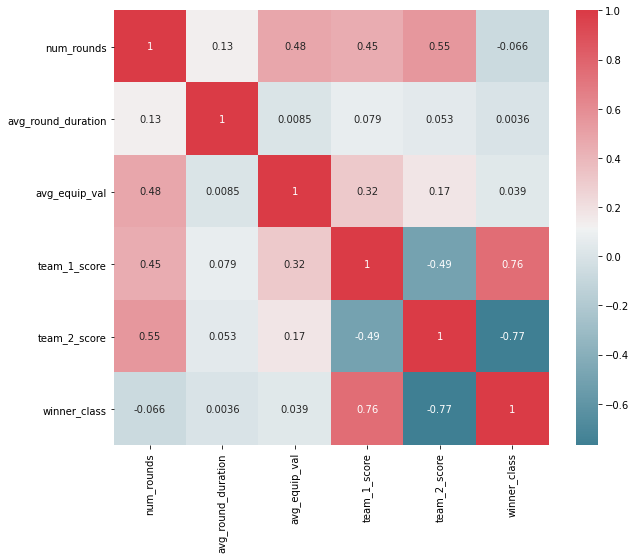

In [14]:
f, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(corr_matches_agg, mask=np.zeros_like(corr_matches_agg, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax,annot=True)

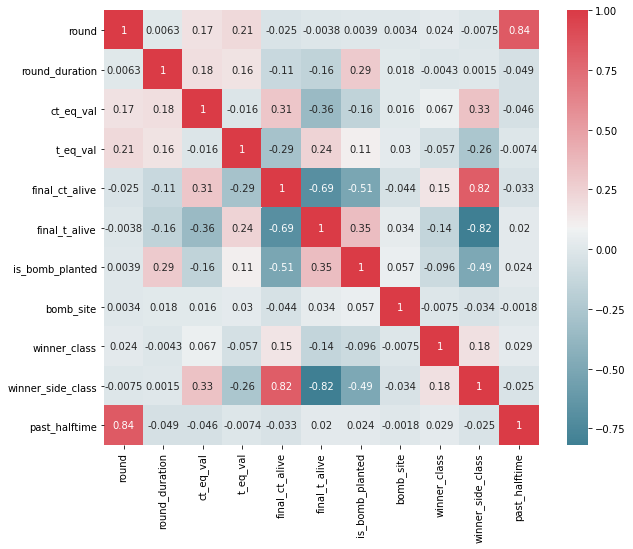

In [15]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_rounds_agg, mask=np.zeros_like(corr_rounds_agg, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax,annot=True)

In [16]:
# pd.plotting.scatter_matrix(std_matches_agg, alpha = 0.3, figsize = (20,20), diagonal = 'kde')
# #plt.show()

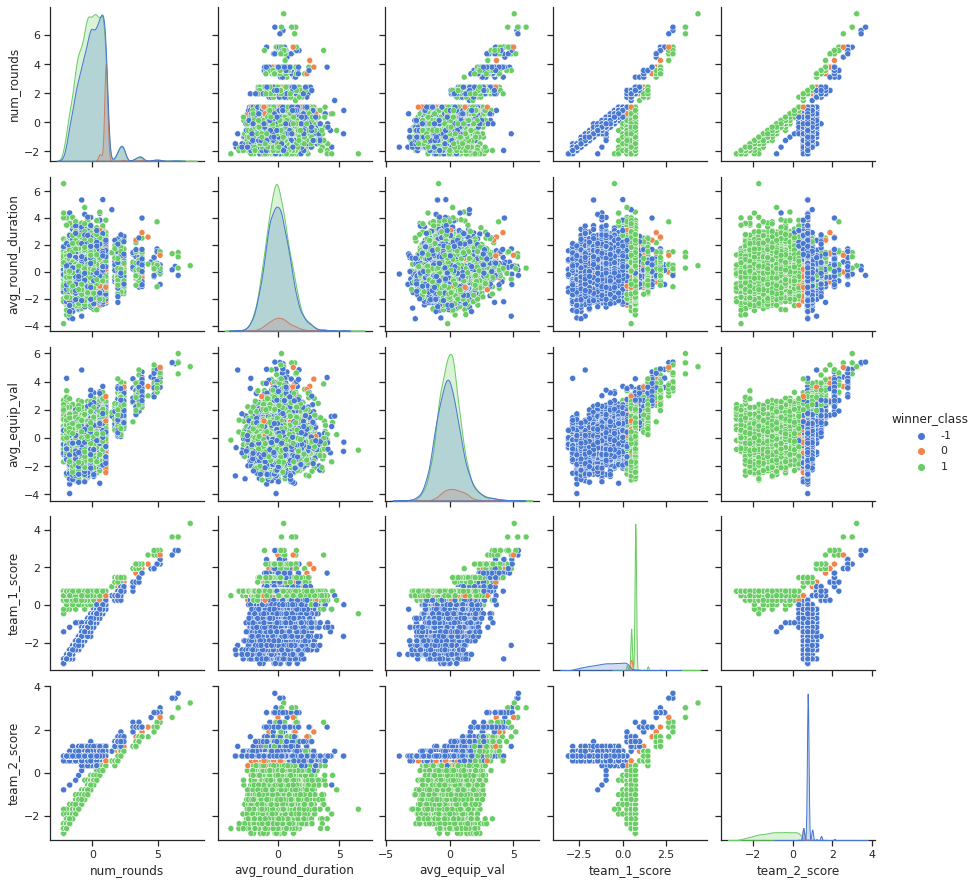

In [17]:
sns.set_theme(style="ticks")

g = sns.pairplot(std_matches_agg, hue="winner_class", palette="muted")
#g.map_lower(sns.kdeplot, levels=4, color=".2")

# g = sns.PairGrid(std_matches_agg, hue="winner_class", palette="muted")
# g.map_upper(sns.scatterplot)
# g.map_lower(sns.kdeplot)
# g.map_diag(sns.kdeplot)

In [ ]:
# sns.set_theme(style="ticks")

# sns.pairplot(std_rounds_agg, hue="winner_class", palette="muted")

In [19]:
std_rounds_agg

,round,round_duration,ct_eq_val,t_eq_val,final_ct_alive,final_t_alive,map,is_bomb_planted,bomb_site,winner_class,winner_side_class,past_halftime
0,-1.584582,-0.734664,-1.399625,-1.609951,-0.916157,-0.242764,de_overpass,1,-1,-1,-1,0
1,-1.459545,1.091897,-1.209110,0.119316,-0.290183,0.392589,de_overpass,0,0,-1,-1,0
2,-1.334508,-0.912514,-1.080513,0.102194,-0.916157,1.663297,de_overpass,0,0,-1,-1,0
3,-1.209471,0.244623,0.562679,0.575888,-0.916157,-0.242764,de_overpass,1,1,-1,-1,0
4,-1.084434,-1.363770,-1.294842,0.250580,0.961767,-0.878118,de_overpass,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
340328,0.541048,-1.411909,-1.380574,0.410380,-0.916157,1.027943,de_mirage,0,0,1,-1,1
340329,0.666085,-1.012170,-0.247010,0.884074,-0.916157,1.027943,de_mirage,0,0,1,-1,1
340330,0.791123,-1.314179,-0.370845,0.872660,-0.916157,1.027943,de_mirage,0,0,1,-1,1
340331,0.916160,-1.236340,-0.137464,0.815588,-0.916157,0.392589,de_mirage,0,0,1,-1,1


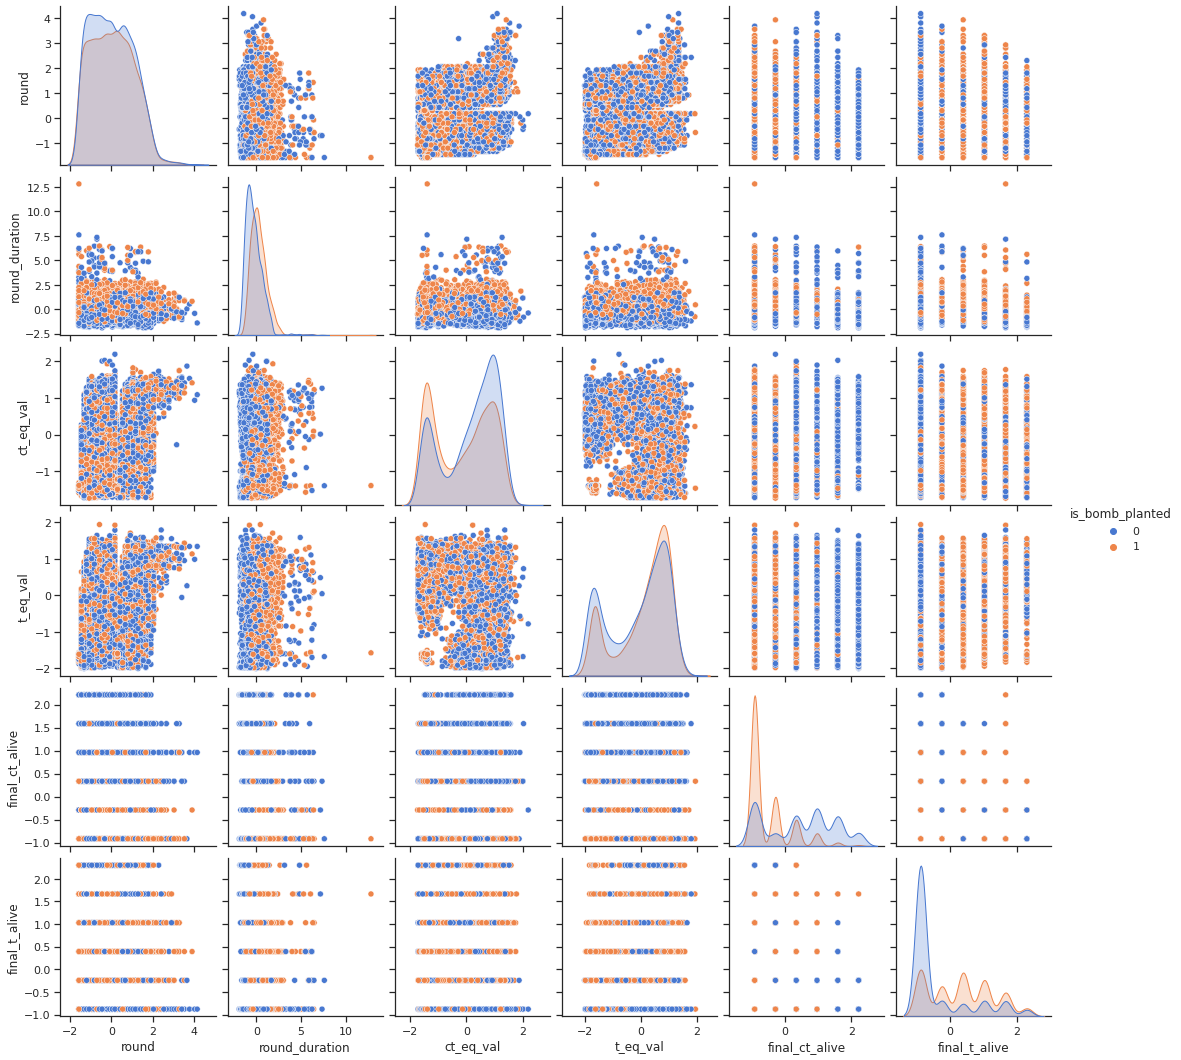

In [24]:
sns.set_theme(style="ticks")

cols_to_plot=['round',	'round_duration',	'ct_eq_val', 't_eq_val', 'final_ct_alive', 'final_t_alive','is_bomb_planted']
batch_to_plot = std_rounds_agg[cols_to_plot][:10000] #the dataset is 340k rows long. Therefore, just plot the first 10k rows

sns.pairplot(batch_to_plot, hue="is_bomb_planted", palette="muted")


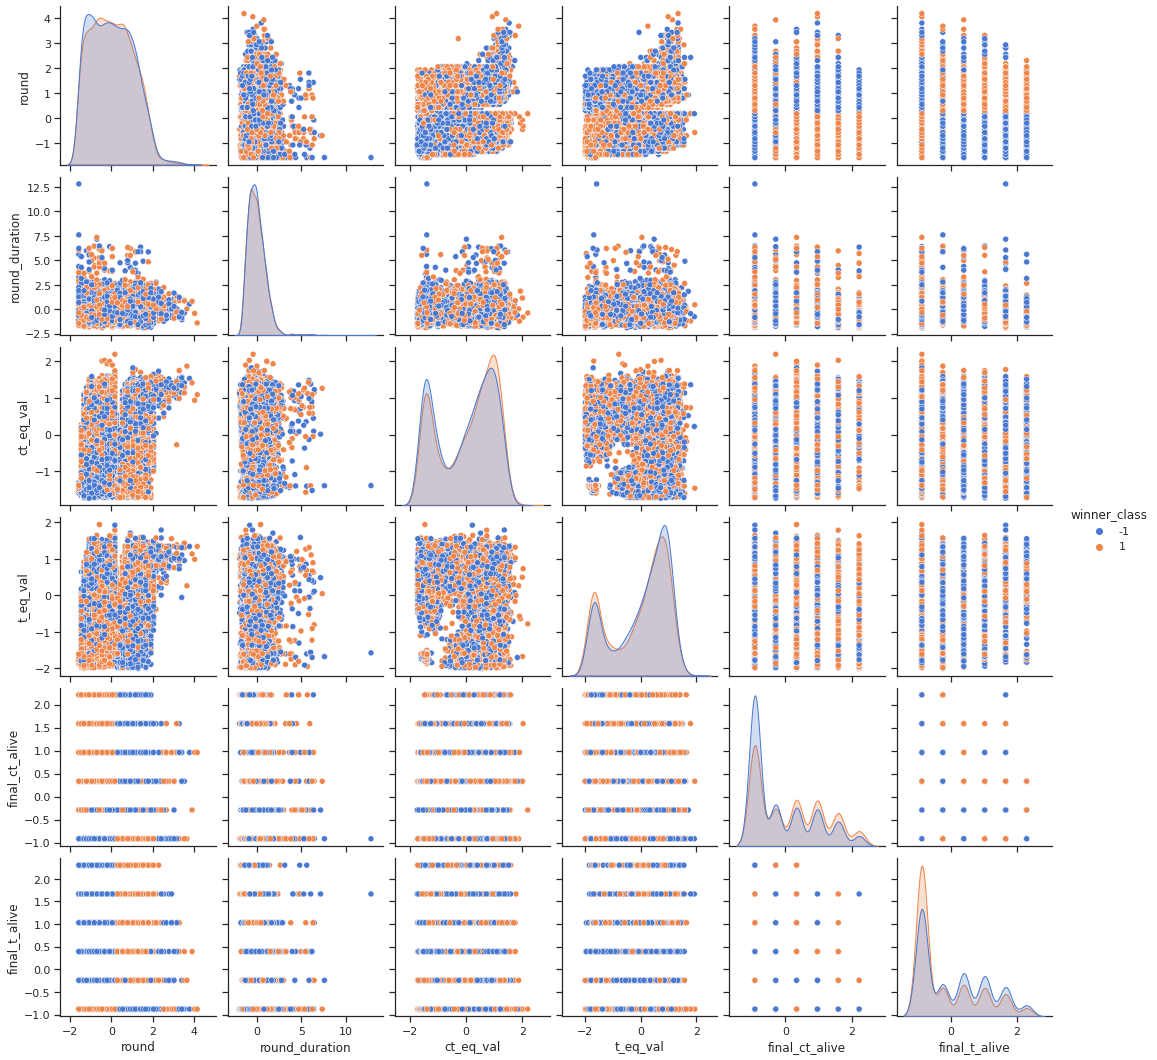

In [25]:
cols_to_plot=['round',	'round_duration',	'ct_eq_val', 't_eq_val', 'final_ct_alive', 'final_t_alive','winner_class']
batch_to_plot = std_rounds_agg[cols_to_plot][:10000] #the dataset is 340k rows long. Therefore, just plot the first 10k rows

sns.pairplot(batch_to_plot, hue="winner_class", palette="muted")

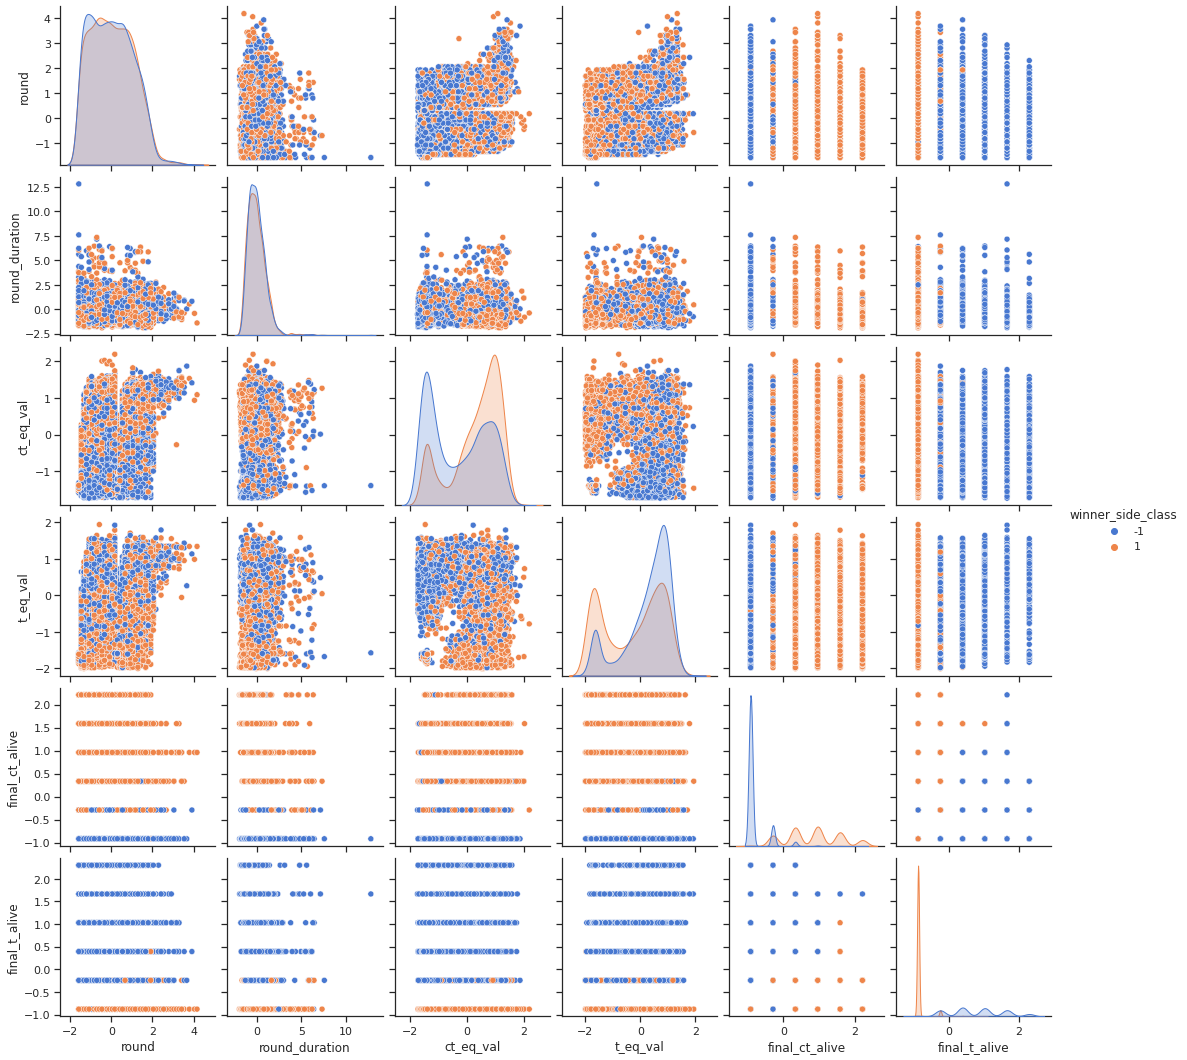

In [26]:
cols_to_plot=['round',	'round_duration',	'ct_eq_val', 't_eq_val', 'final_ct_alive', 'final_t_alive','winner_side_class']
batch_to_plot = std_rounds_agg[cols_to_plot][:10000] #the dataset is 340k rows long. Therefore, just plot the first 10k rows

sns.pairplot(batch_to_plot, hue="winner_side_class", palette="muted")